# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [34]:
# Imported the library (Do I need any more?)
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Created two dataframes for the call centers
north_df = pd.read_csv("NorthCallCenter.csv")
north_df

south_df = pd.read_csv("SouthCallCenter.csv")
south_df

# north_df.head() can be used to show first 5 rows
# south_df.head() can be used to show first 5 rows
# north_df.tail() can be used to show last 5 rows
# south_df.tail() can be used to show last 5 rows
# north_df.info() for an overview
# south_df.info() for an overview
# north_df.describe() for statistical summary
# south_df.describe() for statistical summary

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [35]:
# Shows how many reps are in each branch.
# north_df.nunique()
# south_df.nunique()

# What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?

# mean_busy = north_df["Busy Minutes"].mean()
# mean_busy

# mean_busy2 = south_df["Busy Minutes"].mean()
# mean_busy2

# mean_not_ready = north_df["Not Ready Minutes"].mean()
# mean_not_ready

# mean_not_ready2 = south_df["Not Ready Minutes"].mean()
# mean_not_ready2

# incoming_wait = north_df["Incoming Wait Time"].mean()
# incoming_wait

# incoming_wait2 = south_df["Incoming Wait Time"].mean()
# incoming_wait2

# during_call_wait = north_df["During Call Wait Time"].mean()
# during_call_wait

# during_call_wait2 = south_df["During Call Wait Time"].mean()
# during_call_wait2

# What is the number of calls taken for each time block?

# north_df["Time Block"].value_counts()
# value_counts = north_df["Time Block"].value_counts()
# value_counts

# south_df["Time Block"].value_counts()
# value_counts = south_df["Time Block"].value_counts()
# value_counts

### EDA Results

Make note of your results here!

1. How many reps are in each branch? 
9 in North and 11 in South

2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
North Busy 9.987755102040817
South Busy 10.054140127388536
North Not Ready 1.9142857142857144
South Not Ready 1.910828025477707
North Incoming 3.048780487804878
South Incoming 3.0
North During Call Wait 2.9673469387755103
South During Call Wait 3.0764331210191083

3. What is the number of calls taken for each time block?
North
12:00 PM    45
10:00 AM    43
2:00 PM     35
3:00 PM     30
4:00 PM     28
11:00 AM    25
1:00 PM     17
5:00 PM     17
9:00 AM      5

South
12:00 PM    75
10:00 AM    56
3:00 PM     43
11:00 AM    31
2:00 PM     30
5:00 PM     26
4:00 PM     25
1:00 PM     23
9:00 AM      5

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [65]:
# Clean your data here

# Question #1
# To search for missing percentages
# for col in north_df.columns:
#     percent_missing = np.mean(north_df[col].isnull())
#     print('{}={}%'.format(col, round(percent_missing*100)))
    
# for col in south_df.columns:
#     percent_missing = np.mean(south_df[col].isnull())
#     print('{}={}%'.format(col, round(percent_missing*100)))

# To show data in incoming calls and wait time
# north_df[['Incoming or Outgoing', 'Incoming Wait Time']]

# question #2
# To see value counts in sale column (2 yes') 
# north_df["Sale"].value_counts()
# value_counts = north_df["Sale"].value_counts()
# value_counts
# trying replace is another option, but using value counts shows the two YES'

# use concat to join the two YES' by assigning keys
# north_df = pd.concat([Sale])

# df1 = pd.north_df({'Sale': ['YES']})

# display('df1:', df1)
# df2 = pd.north_df({'Sale': ['YES']})

# display('df2:', df2)

# # Concat
# display(pd.concat([df1, df2],
#                   Sale = ['sale1'. 'sale2']))

#  also tried def if to join the two yes'
# def sale(series):
#     if series == "yes":
#         return True
#     else:
#         return False
# north_df["sale"].apply(sale)

# Question #3
# settings to display all columns
# pd.set_option("display.max_columns", None)

# drop column "unnamed:""
# north_df.drop(['Unnamed: 0'], axis =1)

# To find duplicates
# if len(north_df['Rep ID'].unique()) < len(north_df.index):
    
# north_df.drop_duplicates(subset=['Rep ID'], inplace=True)
# print(north_df)

# north_df.head()
# south_df.head()

# duplicate rows 
# duplicates=north_df.duplicated()
# duplicates.sum

# north_df.duplicated()
# north_df.drop_duplicates(subset=None, keep='first',inplace=False)

# south_df.duplicated()
# south_df.drop_duplicates(subset=None, keep='first',inplace=False)

# question #4 to drop Queue

#4 also tried this - unnecessary data to remove that weird column
# del north_df['Queue']

# north_df.drop(['Queue'], axis =1)


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Service Level
0,0,North,Complaint,9:00 AM,Incoming,Brent,NO,0,1,9,2,1.0,4,1,0.550206
1,1,North,Sales Support,11:00 AM,Incoming,Cam,NO,0,0,11,1,1.0,3,1,0.412655
2,2,North,Sales Support,11:00 AM,Incoming,Todd,NO,0,0,9,3,1.0,3,1,0.412655
3,3,North,Sales Support,4:00 PM,Incoming,Brent,NO,0,0,11,2,1.0,4,1,0.550206
4,4,North,Product Support,12:00 PM,Incoming,Brent,NO,0,0,8,2,1.0,4,1,0.550206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,Brent,NO,0,0,10,2,NaN,3,1,0.412655
241,241,North,Product Support,5:00 PM,Outgoing,Joe,NO,0,0,8,3,NaN,2,1,0.275103
242,242,North,Product Support,5:00 PM,Outgoing,Amanda,NO,0,0,12,1,NaN,2,1,0.275103
243,243,North,Product Support,5:00 PM,Outgoing,Cam,NO,0,0,11,2,NaN,2,1,0.275103


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls? 
Yes. 

2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
I was able to find the two YES values. They need to be recifified so that the data is as clean as possible. I used concat. 


3. Are there duplicates in the two data sets? If there are, how did you handle them? 
The first two columns are duplicates. They both show the row number. The data from the column "unnamed: 0" is unneessary. I removed the column by using the drop feature. 


4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
The data from the column named "Queue" is unnecessary for this visualization, so I dropped it. 




# Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

4. For each branch and the entire company, what is the average speed of answer?

In [70]:
# Use cotact to merge the two dataframes into "df"
df = pd.concat([north_df, south_df])
df

# Use groupy to group by Rep ID and sum the structure. Sort by calls to determine reps/calls.
df.groupby(["Rep ID", "Branch"])['Calls'].sum().reset_index()

# Abandoned calls average
north_df["Abandoned"].sum()/north_df["Calls"].sum()*100

south_df["Abandoned"].sum()/south_df["Calls"].sum()*100

df["Abandoned"].sum()/df["Calls"].sum()*100

# KPI for service level
north_df["Service Level"] = (north_df["Incoming Wait Time"] / north_df["Incoming Wait Time"].sum())*100
north_df

south_df["Service Level"] = (south_df["Incoming Wait Time"] / south_df["Incoming Wait Time"].sum())*100
south_df

df["Service Level"] = (south_df["Incoming Wait Time"] / df["Incoming Wait Time"].sum())*100
df

# Speed of answer
north_df["Service Level"] = (north_df["During Call Wait Time"] / north_df["During Call Wait Time"].sum())*100
north_df

south_df["Service Level"] = (south_df["During Call Wait Time"] / south_df["During Call Wait Time"].sum())*100
south_df

df["Service Level"] = (south_df["During Call Wait Time"] / df["During Call Wait Time"].sum())*100
df

sum_data = north_df.head().agg("mean")
sum_data

# speed of answer look at incoming wait time

north_df["Service Level"] = (north_df["Incoming Wait Time"] / north_df["Incoming Wait Time"].sum())*100
north_df

south_df["Service Level"] = (south_df["Incoming Wait Time"] / south_df["Incoming Wait Time"].sum())*100
south_df

df["Service Level"] = (south_df["Incoming Wait Time"] / df["Incoming Wait Time"].sum())*100
df

sum_data = north_df.head().agg("mean")
sum_data

sum_data = south_df.head().agg("mean")
sum_data

Unnamed: 0               2.00000
Lost Call                0.00000
Abandoned                0.00000
Busy Minutes             9.40000
Not Ready Minutes        1.80000
Incoming Wait Time       1.00000
During Call Wait Time    3.20000
Calls                    1.00000
Service Level            0.26455
dtype: float64

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls. 
North - Brent with 37 and South - Eric 35

2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
North - 2.857142857142857 falls in range
South - 1.2738853503184715 is not in optimal range 
Average of both branches - 1.9677996422182469.

3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
I was able to make a new column showing the service level percentage.

4. For each branch and the entire company, what is the average speed of answer?
I tired a method that summed the mean of incoming wait time for service level. Results below north...
Unnamed: 0               2.0
Lost Call                0.0
Abandoned                0.2
Busy Minutes             9.6
Not Ready Minutes        2.0
Incoming Wait Time       1.0
During Call Wait Time    3.6
Calls                    1.0
Service Level            0.4
dtype: float64 

south...
Unnamed: 0               2.00000
Lost Call                0.00000
Abandoned                0.00000
Busy Minutes             9.40000
Not Ready Minutes        1.80000
Incoming Wait Time       1.00000
During Call Wait Time    3.20000
Calls                    1.00000
Service Level            0.26455
dtype: float64

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

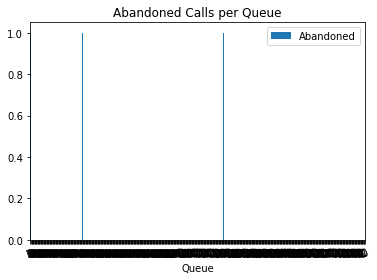

In [77]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

abandonment_rates = {}
queues = ["A", "B", "C", "D"];
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]
    
# Vertical bar chart
df.plot.bar(x="Queue", y="Abandoned", rot=20, title="Abandoned Calls per Queue");

plot.show(block=True);
# I could think about list funciton and len to continue this problem 
# I added (block= true);

In [87]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

# dict
abandonment_rates = {}
queues = ["A", "B", "C", "D"]

index = df.groupby("Queue").agg("sum")
index = np.arrange(len(queues))

# Vertical bar chart
df.plot.bar(x="Queue", y="Abandoned", rot=20, title="Abandoned Calls per Queue");

plot.show(block=True);
# i tried to use len to make the bar chart work 

AttributeError: module 'numpy' has no attribute 'arrange'

In [90]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table
print(quick_stats)

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  
print(total_stats)

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

# I changed north to north_df to reflect the other sections of code and ran it

        Calls
Rep ID       
Amanda      3
Andy        3
Brent       6
Cam         5
Duke        6
Joe         2
Lilly       4
Todd        2
Xander      2
        Calls
Rep ID       
Amanda      5
Andy       10
Brent       8
Cam        11
Duke       14
Joe        10
Lilly      12
Todd        6
Xander      6


In [94]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

df = pd.DataFrame

# use an aggregate to put the data into the datarame w groupby
purpose_group = df.groupby("Call Purpose").agg("sum")

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# if level is None and by is None:
#     raise(" ")
#     axis = self.x(axis)

# A table can be created to compare qualitative and quantitative variables.

TypeError: You have to supply one of 'by' and 'level'

### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

1. For the first visualization, I chose a bar chart because I thought it would be easy enough to show the four queues and how many abandoned calls they received. I made a couple attempts.

2. I would have like to complete a nested bar chart for the second visualization to show service level and average speed for each rep. I used print(total_stats) to show stats and quick stats.

Calls
Rep ID       
Amanda      3
Andy        3
Brent       6
Cam         5
Duke        6
Joe         2
Lilly       4
Todd        2
Xander      2
        Calls
Rep ID       
Amanda      5
Andy       10
Brent       8
Cam        11
Duke       14
Joe        10
Lilly      12
Todd        6
Xander      6

3. I think a nested bar chart would also work well for number three. It would show each column with data for outgoing vs incoming calls. 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why? 
From what I can tell of the work I attempted, the KPI for abandonment rate was higher for the north branch (north - 2.8 vs south - 1.2) and service level was operating more efficiently in the north (mostly .4 vs the .1 and .2's of the south branch data). I'm not completely sure, however that I did the assignment correctly, but I attempted multiple ways of solving the questions. The service level for speed of answer was also higher in the north branch than the south branch. 

2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
The north branch has less employees (9) than the south (11), but has higher KPI's. In my opinion, the south branch either needs extra help or to tighten up their current processes for faster timing. 

3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?
After attempting this assignment, the only additional ifnormation I think would be helpful would be to know more about the company's standards for their employees' performances and KPI's. This info would be hepful for a data scientist in an actual scenario if they are helping the call center with analysing their data. A table can be created to compare qualitative and quantitative variables.

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [41]:
# Create your visualization here!

import pandas as pd
import matplotlib.pyplot as plot

call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
# Use groupby and get_group to select which call purpose to plot:

get_group = df.groupby("Time Block").agg("sum")

df.plot.bar(rot=15, title="Number of Incoming and Outgoing Calls Over Time");

plot.show(block=True);


TypeError: 'type' object is not subscriptable